<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment2/MLAA_Notebook_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6'

In [7]:
df_total = pd.read_csv(file_url)

In [8]:
df_total.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


### 2. Explore Dataset

In [9]:
df = df_total.copy(deep = True)

In [13]:
df.shape

(131337, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [10]:
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

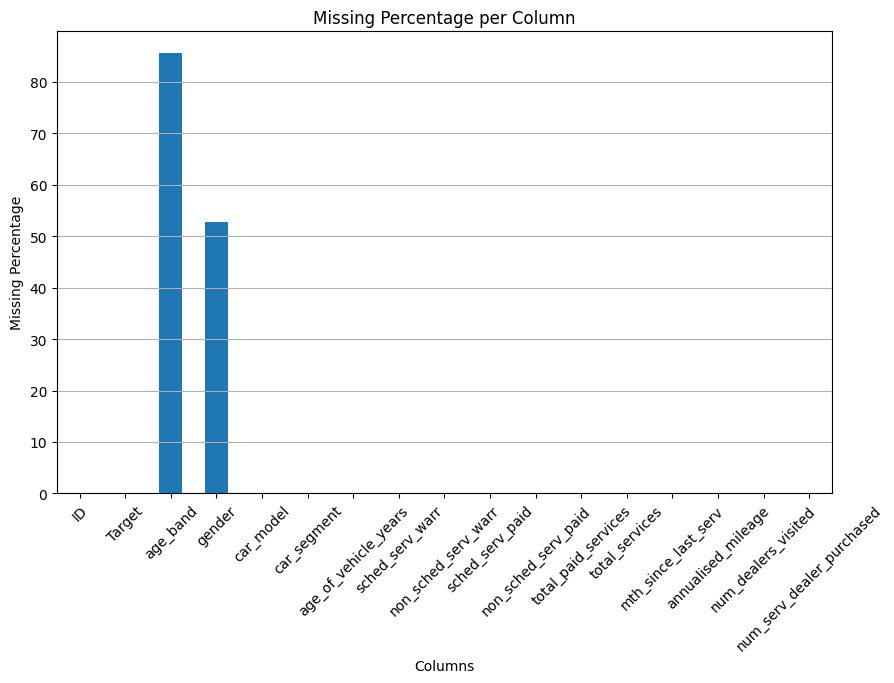

In [16]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing Percentage per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

* Age_band may be better to remove since is almost completly Nan
* Is necessery to know how important is the gender varable to think is drop the variable or try to impute it.

### 3. Explore Target variable

In [19]:
target = 'Target'

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

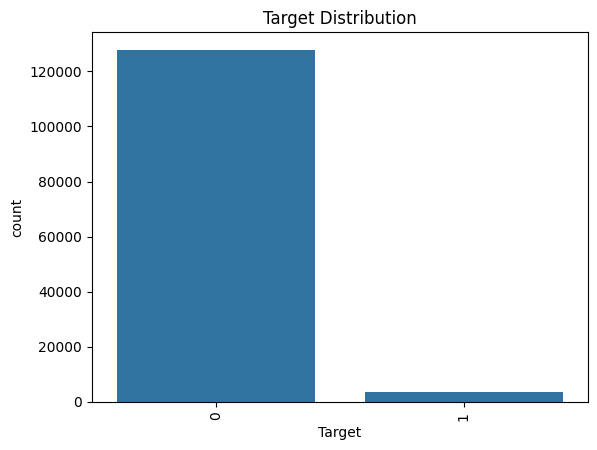

In [21]:
sns.countplot(data=df, x=target, order=df[target].value_counts().index)
plt.title(f'{target} Distribution')
plt.xticks(rotation=90)

imbalance target variable

### 4. Explore Variables of Interest

### 5. Prepare Data

In [37]:
def clean_and_preprocess_df(df_treated):
    df_processing = df_treated.copy()

    # Droping columns
    df_processing.drop(columns=['ID','age_band','gender'], inplace=True)

    #Feature scaling and transforming

    # Min Max Scaler
    numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns.drop('Target')
    scaler = MinMaxScaler()
    df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])

    # One hot encoding
    dummies_df = pd.get_dummies(df_processing[['car_model',	'car_segment']], drop_first=True).astype(int)
    df_processing = pd.concat([df_processing, dummies_df], axis=1)
    df_processing.drop(['car_model',	'car_segment'], axis=1, inplace=True)

    return df_processing

In [40]:
clean_and_preprocess_df(df_total).head(1)

,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_model_model_10,car_model_model_11,car_model_model_12,car_model_model_13,car_model_model_14,car_model_model_15,car_model_model_16,car_model_model_17,car_model_model_18,car_model_model_19,car_model_model_2,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,0.888889,0.111111,1.0,0.222222,0.666667,0.444444,0.555556,0.888889,0.777778,1.0,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Split Dataset

In [42]:
df_model = clean_and_preprocess_df(df_total)

In [43]:
X = df_model.drop('Target', axis=1)
y = df_model['Target']

In [44]:
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.33, random_state=42)

### 7. Baseline Model

In [52]:
train_mode = statistics.mode(y_train)

In [55]:
y_central_train = np.full(y_train.shape, train_mode)
y_central_val = np.full(y_val.shape, train_mode)
y_central_test = np.full(y_test.shape, train_mode)

In [58]:
accuracy_train_baseline = accuracy_score(y_train, y_central_train)
precision_train_baseline = precision_score(y_train, y_central_train, average='macro', zero_division=0)
recall_train_baseline = recall_score(y_train, y_central_train, average='macro')
f1_train_baseline = f1_score(y_train, y_central_train, average='macro')

accuracy_val_baseline = accuracy_score(y_val, y_central_val)
precision_val_baseline = precision_score(y_val, y_central_val, average='macro', zero_division=0)
recall_val_baseline = recall_score(y_val, y_central_val, average='macro')
f1_val_baseline = f1_score(y_val, y_central_val, average='macro')

accuracy_test_baseline = accuracy_score(y_test, y_central_test)
precision_test_baseline = precision_score(y_test, y_central_test, average='macro', zero_division=0)
recall_test_baseline = recall_score(y_test, y_central_test, average='macro')
f1_test_baseline = f1_score(y_test, y_central_test, average='macro')

In [61]:
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy_train_baseline, accuracy_val_baseline, accuracy_test_baseline],
    'Precision': [precision_train_baseline, precision_val_baseline, precision_test_baseline],
    'Recall': [recall_train_baseline, recall_val_baseline, recall_test_baseline],
    'F1 Score': [f1_train_baseline, f1_val_baseline, f1_test_baseline]
}, index=['Train Baseline', 'Validation Baseline', 'Test Baseline'])

In [62]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.972098,0.486049,0.5,0.492926
Validation Baseline,0.974930,0.487465,0.5,0.493653
Test Baseline,0.973513,0.486756,0.5,0.493289


### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =